<a href="https://colab.research.google.com/github/sergiorocha-tj/Projetos-Acompanhados/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

**Obtenção dos Dados**
Todos os dados usados aqui tem como fonte o [Site Airbnb](http://insideairbnb.com/)
Para essa análise exploratório, será baixado apenas o seguinte arquivo:

*   listings.csv - *Informações resumidas e métricas para listagens no Rio de Janeiro (bom para visualizações)*.



In [ ]:
# Importar os Pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importar o Aquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-10-26/visualisations/listings.csv")

**Análise dos Dados**
Esta etapa tem como objetivo criar uma conscienia situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das Variáveis**

*   id - nº Gerado para Imóvel
*   name - nome da Propriedade
*   host_id - número de id do proprietário anfitrião
*   host_name - Nome do anfitrião
*   neighbourhood - Nome do Anfitrião
*   neighbourhood_group - Sem valor válido
*   latidude - latidude
*   longitude - longitude 
*   room_type - Informa o tipo de quarto ofertado
*   price - preço para alugar imóvel
*   minimum_nights - Qtde minima noites
*   last_review - data do último review
*   reviews_per_month - Qtde reviews por mês
*   calculated_host_listings_count - Qdade imoveis mesmo anfitrião
*   availability_365 - nº dias diponível dentro de 365 dias

Vamos abrir as 5ª entradas do *dataset*.




In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,266,2021-05-21,2.07,1,262,12,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2017-04-22,0.85,1,57,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,168,4,238,2019-04-27,1.84,1,300,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,278,2,181,2019-12-06,1.90,1,179,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,150,3,373,2019-06-15,3.05,1,59,34,NaN


# **Q1. Quantos atributos (variáveis ) e quantas Entradas o nosso conjunto de dados possui? Quais os tipos de Variáveis?**


In [ ]:
#Tamnho do arquivo (Linhas x Colunas)
df.shape

(23359, 18)

In [ ]:
#Identificar o volume de dados do DataFrame
print("Variváris:\t {}". format(df.shape[0]))
print("Entradas:\t {}\n". format(df.shape[1]))
print("Entradas: \t", df.shape[1])

Variváris:	 23359
Entradas:	 18

Entradas: 	 18


In [ ]:
#Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

# **Q2. Qual a porcentagem de dados ausentes no data Set?**

*   Coluna neighbourhood_group possui 100% dos seus dados faltantes.
*   Variáveis reviews_per_month e last_review possuem quase 50% de valores nulos.
*   Variáveis name e host_name tem aproximadamente 0,1% dos valores nulos.

In [ ]:
#Ordenar em ordem descrescente as várias por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.353269
last_review                       0.353269
name                              0.000899
host_name                         0.000214
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [ ]:
#Soma quantos valores faltantes existem
df.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood_group               23359
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8252
reviews_per_month                  8252
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           23359
dtype: int64

In [ ]:
#Quantidade de Valores
df.shape[0]

23359

In [ ]:
#Pegar valor e dividir pelo Quantidade Total, Resultando na porcentagem
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000899
host_id                           0.000000
host_name                         0.000214
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.353269
reviews_per_month                 0.353269
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

# **Q3. Qual o tipo de Distribuição das Variáveis?**

Para identificar a Distribuição das Variáveis, será plotado o Histograma.

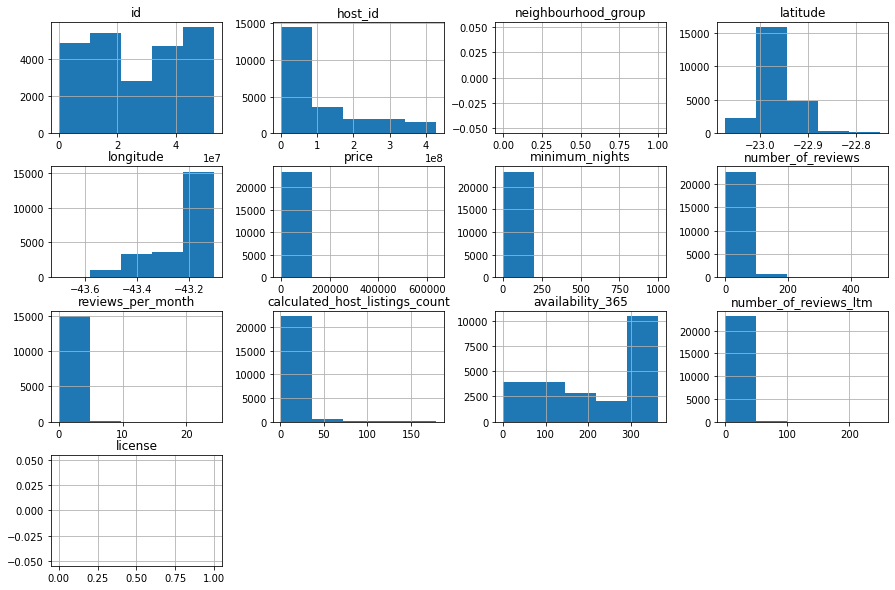

In [ ]:
#Plotar o Histograma das Variáveis Numéricas
df.hist(bins=5, figsize=(15,10));

# **Q4. Há Outliers Presentes?**
O Histograma apresenta índicios de Outtliers. 
Váriáveis que são seguem uma distribuição, distorcem o Gráfico. Para se ter a confirmação, há 2 maneiras de identificá-los:
*   Resumo Estatístico por meio do Método *describe()*
*   Plotar *boxplots* para a varivável

In [ ]:
#Ver o Resumo estatístico das Variáveis Numéricas
#Caso usasse df.describer() estaria trazendo as informações de todas as Váriaveis, o que não interessa
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,23359.000000,23359.000000,23359.000000,15107.000000,23359.000000,23359.000000,23359.000000
mean,729.485509,5.316152,14.398990,0.674982,6.990154,223.666039,3.360375
std,4977.724917,22.583058,33.709045,0.930358,20.616919,131.739668,8.125931
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,160.000000,1.000000,0.000000,0.090000,1.000000,89.000000,0.000000
50%,286.000000,3.000000,2.000000,0.300000,1.000000,256.000000,0.000000
75%,561.000000,4.000000,11.000000,0.950000,3.000000,359.000000,2.000000
max,637760.000000,1000.000000,494.000000,24.350000,179.000000,365.000000,250.000000


#Boxplot para Minimum_nights

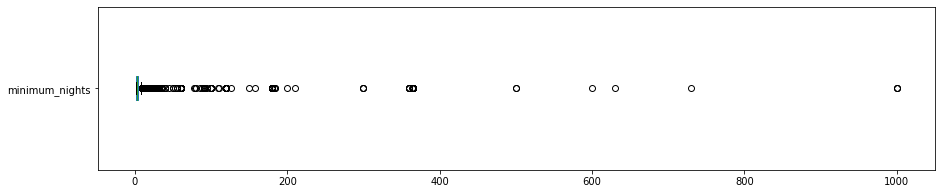

minimum_nights: valores acima de 30:
264 entradas
1.1302%


In [ ]:
# minimum_Nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30 ]) / df.shape[0])*100))

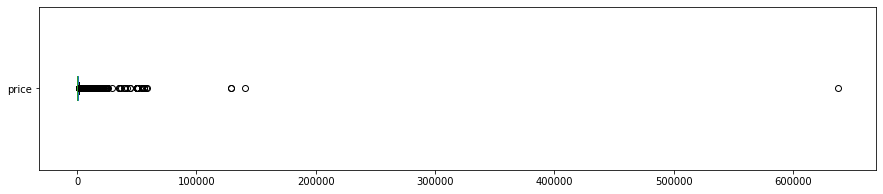


price: valores acima de 1500:
1677 entradas
7.1792%


In [ ]:
# ver Valores acima de 1500 para price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()
print("\nprice: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500 ]) / df.shape[0])*100))

**Histogramas sem outliers**
Como identificamos outliers nas variáveis *price* e *minimum_nights*, vamos limpar o DataFrame e plotar novamente o Histograma.

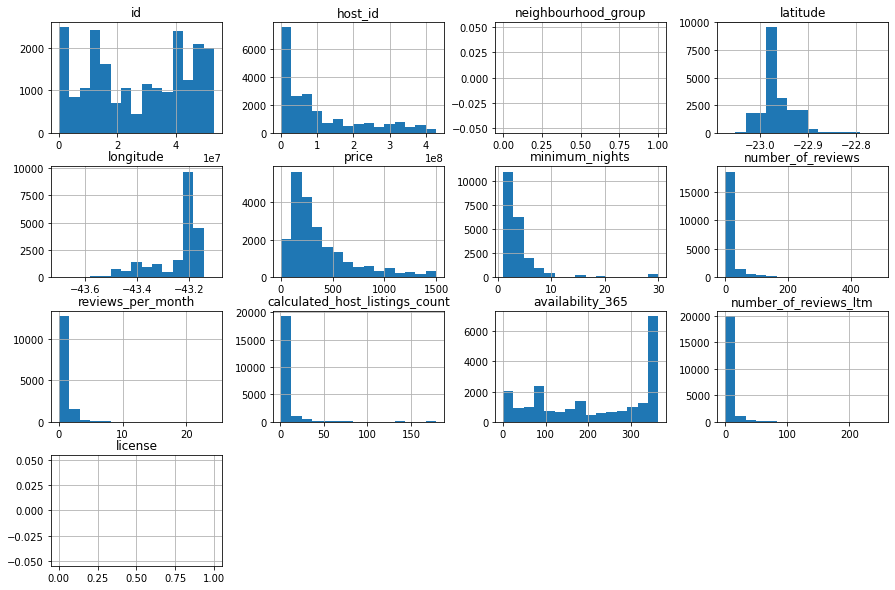

In [ ]:
# Remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover caso houvesse Váriáveis vazias usaria o código
# <df_clean.drop('neighbourhood_group', axis=1, inplace=True)>

# plotar o Histograma para as Variáveis Numéricas
df_clean.hist(bins=15, figsize=(15,10));